The aim of this workbook is to explore the Integrated Gradients implementation.

### Modell trainieren

100%|██████████| 10/10 [00:15<00:00,  1.57s/it]


Final metrics: 
Test-Loss: 0.3029196546276846
Test-Accuracy: 0.8031049370765686
Train-Loss: 0.2951610984806242
Train-Accuracy: 0.8115718960762024
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


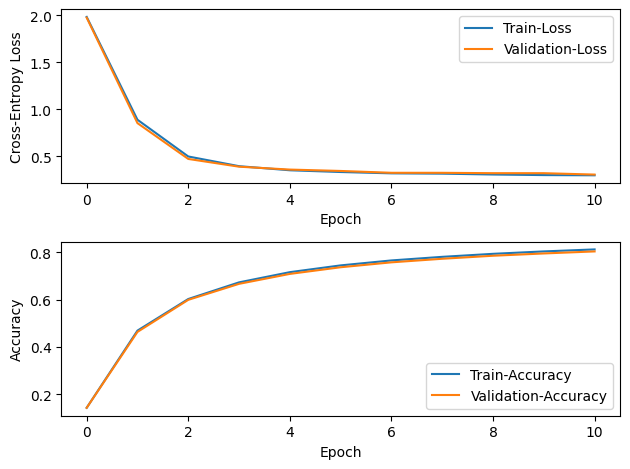

In [1]:
from model.training import train_model_and_visualize
model = train_model_and_visualize([8])

# Instanzweises testen der IG scores

In [2]:
from model.attribution_methods.integrated_gradients import IntegratedGradients
from data.datasets import DryBean
from data.util.utils import DatasetMode

dataset = DryBean(mode=DatasetMode.TEST)

ig = IntegratedGradients(model.get_gradients_with_respect_to_inputs)

x,true_y = dataset[0]
model.eval()
pred_y = model.predict(x)

attribution_score = ig.attribute(x,target_label_index=None,n_steps=500)
print("Attribution Scores: "  + str(attribution_score))
print("Reihenfolge: " + str(attribution_score[0].argsort(descending=True)))

Attribution Scores: (tensor([-0.1033, -0.1716, -0.1565, -0.1553,  0.0070, -0.0072, -0.1057, -0.1858,
        -0.1543,  0.1351,  0.3169,  0.1249,  0.6285,  0.4284,  0.0385,  0.0562]), 3)
Reihenfolge: tensor([12, 13, 10,  9, 11, 15, 14,  4,  5,  0,  6,  8,  3,  2,  1,  7])


c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)


### Testen des Completeness Axioms durch Veränderung der num_steps

100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


Final metrics: 
Test-Loss: 0.3029196546276846
Test-Accuracy: 0.8031049370765686
Train-Loss: 0.2951610984806242
Train-Accuracy: 0.8115718960762024
# Parameters: 199
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=7, bias=True)
  )
)


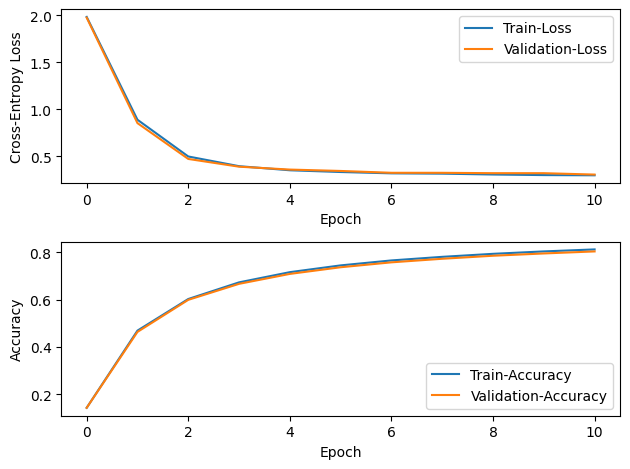

0it [00:00, ?it/s]c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
1362it [00:04, 287.06it/s]
1362it [00:13, 102.75it/s]
1362it [00:21, 62.92it/s]
1362it [00:30, 44.84it/s]
1362it [00:38, 35.23it/s]
1362it [00:46, 29.01it/s]
1362it [00:52, 25.74it/s]
1362it [01:00, 22.52it/s]


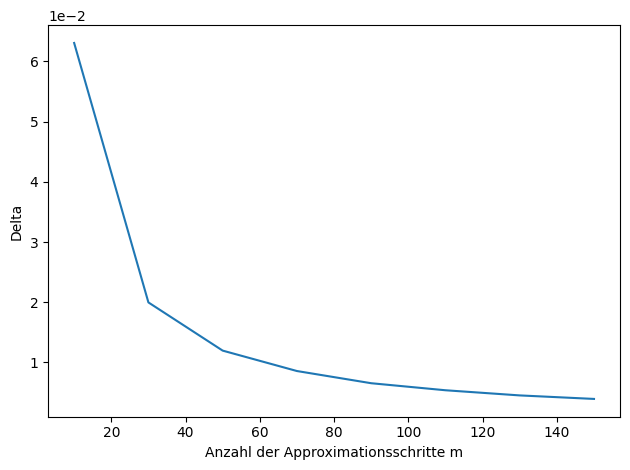

In [3]:
from model.training import train_model_and_visualize
model = train_model_and_visualize([8])

from evaluation import IntegratedGradientsEvaluator

evaluator = IntegratedGradientsEvaluator(model=model)

evaluator.visualize_completess_deltas_comparison(range(10,151,20))

num_steps = 30

In [4]:
from evaluation import IntegratedGradientsEvaluator

evaluator = IntegratedGradientsEvaluator(model=model)
evaluator.completeness_deltas_statistics(n_steps=30)

0it [00:00, ?it/s]

c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:54: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
c:\Users\leons\programming\PG Attribution Methods\Project_Group_Attribution_Method\model\models.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
1362it [00:12, 105.65it/s]

Mittlere absolute Abweichung:  2.00e-02
Maximum der betragsmäßigen Abweichung;  8.06e-02
Minimum der betragsmäßigen Abweichung:  4.77e-07


num_steps = 50

In [5]:
evaluator.completeness_deltas_statistics(n_steps=50)

1362it [00:21, 64.84it/s]

Mittlere absolute Abweichung:  1.20e-02
Maximum der betragsmäßigen Abweichung;  5.20e-02
Minimum der betragsmäßigen Abweichung:  1.54e-05


num_steps = 100

In [6]:
evaluator.completeness_deltas_statistics(n_steps=100)

1362it [00:42, 31.96it/s]

Mittlere absolute Abweichung:  5.90e-03
Maximum der betragsmäßigen Abweichung;  2.37e-02
Minimum der betragsmäßigen Abweichung:  1.00e-05
